In [141]:
import os

#Set the repo as your working directory
#os.chdir(r'C:\Users\chandrv\Risk_Dashboards\ge_dashboard')
         
import datetime as dt
import pandas as pd
import RiskEngine.RiskPortfolio as erp
import RiskEngine.Factors as fct
import RiskEngine.PortfolioReturns as pret
import RiskEngine.dashboard.dashboard_utils as utils
pd.options.mode.chained_assignment = None  # default='warn'
from IPython.display import display
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# RiskPortfolio Methods

### Load a portfolio and generate a full risk report in four lines of code

In [4]:
analysis_date = dt.datetime(2023,9,1)

ep = erp.EquityPortfolio(analysis_date)

ep.set_ocm_portfolio(portfolio_id = 'GE Core', id_type = 'portfolio__program')

ep.set_benchmark(['MXKO','TSX'],index_weights=[0.8,0.2])

risk_summary = ep.generate_risk_report(risk_model='factor',
                                       halflife_corr=756,
                                       halflife_vol=252) #Use factor model with a 3 year halflife for correlations and 1 year halflife for volatility

No match: [None]
Total weight: 0.0067%
No match for risk data: ['CA70137T1057', 'XS0055158231']
Total weight: 0.0433%
RiskFactors initialized for 2023-09-01 00:00:00
Done!


In [6]:
risk_summary.keys()

dict_keys(['Portfolio Risk Stats', 'Asset Risk Stats', 'Benchmark Asset Risk Stats', 'FaCS', 'Asset FaCS', 'Active Exposures', 'Active Risk'])

In [7]:
risk_summary['Portfolio Risk Stats']

,2023-09-01
risk,0.149332
var_95,-0.249128
bm_risk,0.159213
div_ratio,0.424035
bm_div_ratio,0.458770
port_beta,0.919264
active_risk,0.032460
specific_risk_cont,0.019832


In [41]:
display(risk_summary['Asset Risk Stats'].head(10))

,exposure_base_delta_adj,gicsIndustry,security__id_bbg_ticker,marketCapitalizationCurrency,portfolio__pace_id,portfolio__omers_entity,portfolio__program,countryOfRisk,omers_asset_class_b,security__name,security__type,gicsSector,omers_asset_class_a,source__effective_date,security__id_security_alias,portfolio__portfolio,region,region_2,region_3,std_dev_factor,other_risk,specific_risk,ticker,weight,asset_risk,risk_cont,risk_cont_pct,marginal_risk,beta,port_corr
asset_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA0636711016,1.974704e+08,Banks,BMO CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,BANK OF MONTREAL,CMSK,Financials,Public Equities,2023-09-01,332079,GE Core,North America,Canada,Canada,0.212994,0.0,0.113706,BMO,0.016745,0.198218,0.002061,0.013800,0.018378,0.761112,0.620890
CA11271J1075,1.091613e+08,Capital Markets,BN UN,USD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,BROOKFIELD CORP,CMSK,Financials,Public Equities,2023-09-01,617300,GE Core,North America,Canada,Canada,0.332523,0.0,0.167444,BN,0.009256,0.290586,0.001795,0.012018,0.028953,1.210654,0.667208
CA1363851017,2.326429e+08,Oil Gas & Consumable Fuels,CNQ CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,CANADIAN NATURAL RESOURCES,CMSK,Energy,Public Equities,2023-09-01,332167,GE Core,North America,Canada,Canada,0.374012,0.0,0.185011,CNQ,0.019727,0.343146,0.002610,0.017476,0.019756,0.808602,0.385532
CA13646K1084,2.233283e+08,Ground Transportation,CP CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,CANADIAN PACIFIC KANSAS CITY,CMSK,Industrials,Public Equities,2023-09-01,335865,GE Core,North America,Canada,Canada,0.212696,0.0,0.156512,CP,0.018937,0.216269,0.002218,0.014850,0.017487,0.697910,0.541459
CA33564P1036,2.149108e+07,Financial Services,FN CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,FIRST NATIONAL FINANCIAL COR,CMSK,Financials,Public Equities,2023-09-01,662818,GE Core,North America,Canada,Canada,0.240485,0.0,0.194180,FN,0.001822,0.245404,0.000187,0.001249,0.015283,0.635695,0.417028
CA3495531079,1.302115e+08,Electric Utilities,FTS CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,FORTIS INC,CMSK,Utilities,Public Equities,2023-09-01,332295,GE Core,North America,Canada,Canada,0.170697,0.0,0.093267,FTS,0.011041,0.160058,0.000592,0.003962,0.008002,0.297614,0.334772
CA7800871021,1.332233e+08,Banks,RY CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,ROYAL BANK OF CANADA,CMSK,Financials,Public Equities,2023-09-01,332614,GE Core,North America,Canada,Canada,0.164299,0.0,0.093926,RY,0.011297,0.168316,0.001224,0.008199,0.016186,0.662492,0.643946
CA87807B1076,2.168845e+08,Oil Gas & Consumable Fuels,TRP CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,TC ENERGY CORP,CMSK,Energy,Public Equities,2023-09-01,333344,GE Core,North America,Canada,Canada,0.237901,0.0,0.182388,TRP,0.018391,0.236964,0.001881,0.012595,0.015273,0.608762,0.431597
CA87971M1032,1.519030e+08,Diversified Telecommunication Services,T CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,TELUS CORP,CMSK,Communication Services,Public Equities,2023-09-01,332692,GE Core,North America,Canada,Canada,0.184806,0.0,0.121950,T,0.012881,0.168850,0.000993,0.006652,0.011517,0.462589,0.456750


### 1) Load a portfolio

In [43]:

ep = erp.EquityPortfolio(analysis_date) #This creates an empty portfolio object that we can use to load data, run risk reports and others

#If we set an OCM portfolio, we load a list of positions by filtering for the portfolio id and id type in portfoliohub
#The portfolio is then cleaned and processed based on a list of additional arguments passed to the function

ep.set_ocm_portfolio(portfolio_id = 'GE Core', 
                     id_type = 'portfolio__program',
                     fields = None, #Specify any additional fields to query, such as "dm_em"
                    exclude_cash = True, #Remove any positions where the security type is tagged as cash
                    exclude_fx = True,  #Remove any positions where the security type is tagged as FX Fwd
                    agg_col = 'security__id_isin',  #Aggregate positions together with the same ISIN
                    adjust_trs = True, #If True, modify the currency factor exposures of positions held on swap. If False, treat TRS identical to physical equity.
                    lookthrough_types = [], #Lookthrough derivatives. Can be discretionay or non_discretionary
                    filters = None)  #Additional filters to pass to the query, such as "{'type': 'include','field': 'omers_asset_class_b','values': ['Canadian Public Equity', 'Foreign Public Equity']}"

display(ep.portfolio.head())

,exposure_base_delta_adj,gicsIndustry,security__id_bbg_ticker,marketCapitalizationCurrency,portfolio__pace_id,portfolio__omers_entity,portfolio__program,countryOfRisk,omers_asset_class_b,security__name,security__type,gicsSector,omers_asset_class_a,source__effective_date,security__id_security_alias,portfolio__portfolio,region,region_2,region_3,weight,std_dev_factor,other_risk,specific_risk
security__id_isin,,,,,,,,,,,,,,,,,,,,,,,
CA0636711016,1.974704e+08,Banks,BMO CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,BANK OF MONTREAL,CMSK,Financials,Public Equities,2023-09-01,332079,GE Core,North America,Canada,Canada,0.016745,0.212994,0.0,0.113706
CA11271J1075,1.091613e+08,Capital Markets,BN UN,USD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,BROOKFIELD CORP,CMSK,Financials,Public Equities,2023-09-01,617300,GE Core,North America,Canada,Canada,0.009256,0.332523,0.0,0.167444
CA1363851017,2.326429e+08,Oil Gas & Consumable Fuels,CNQ CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,CANADIAN NATURAL RESOURCES,CMSK,Energy,Public Equities,2023-09-01,332167,GE Core,North America,Canada,Canada,0.019727,0.374012,0.0,0.185011
CA13646K1084,2.233283e+08,Ground Transportation,CP CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,CANADIAN PACIFIC KANSAS CITY,CMSK,Industrials,Public Equities,2023-09-01,335865,GE Core,North America,Canada,Canada,0.018937,0.212696,0.0,0.156512
CA33564P1036,2.149108e+07,Financial Services,FN CT,CAD,7297,OCM HOLDING,GE Core,CA,Canadian Public Equity,FIRST NATIONAL FINANCIAL COR,CMSK,Financials,Public Equities,2023-09-01,662818,GE Core,North America,Canada,Canada,0.001822,0.240485,0.0,0.194180


In [55]:
#Instead of a pre-specified OCM portfolio, we can also just input a set of ISINs and corresponding weights

isin_list = ['CA0636711016','US98978V1035','CA11271J1075','CA33564P1036']
exposures = [0.25, 0.25, 0.25, 0.25]

ep_c = erp.EquityPortfolio(analysis_date)

ep_c.set_custom_portfolio(isin_list,exposures)

display(ep_c.portfolio)


#We can do the same thing for a custom benchmark 
benchmark_isin_list = ['US0378331005','US88160R1014']
benchmark_weights = [0.5,0.5]


ep_c.set_custom_benchmark(benchmark_isin_list,benchmark_weights)
display(ep_c.benchmark_portfolio.head())

,exposure_base_delta_adj,weight,gicsSector,gicsIndustry,countryOfRisk,marketCapitalizationCurrency,mxwoBeta,std_dev_factor,other_risk,specific_risk,region,region_2,region_3,security__type
isin,,,,,,,,,,,,,,
CA0636711016,0.25,0.25,Financials,Banks,CA,CAD,None,0.212994,0.0,0.113706,North America,Canada,Canada,CMSK
US98978V1035,0.25,0.25,Health Care,Pharmaceuticals,US,USD,None,0.252886,0.0,0.183961,North America,USA,USA,CMSK
CA11271J1075,0.25,0.25,Financials,Capital Markets,CA,CAD,None,0.332523,0.0,0.167444,North America,Canada,Canada,CMSK
CA33564P1036,0.25,0.25,Financials,Financial Services,CA,CAD,None,0.240485,0.0,0.194180,North America,Canada,Canada,CMSK


,exposure_base_delta_adj,weight,gicsSector,gicsIndustry,countryOfRisk,marketCapitalizationCurrency,mxwoBeta,std_dev_factor,other_risk,specific_risk,region,region_2,region_3
isin,,,,,,,,,,,,,
US0378331005,0.5,0.5,Information Technology,"Technology Hardware, Storage & Peripherals",US,USD,None,0.249381,0.0,0.196827,North America,USA,USA
US88160R1014,0.5,0.5,Consumer Discretionary,Automobiles,US,USD,None,0.619201,0.0,0.464314,North America,USA,USA


### 2) Generate P&L vectors for the loaded portfolio

In [48]:
#Each day, a full set of risk vectors, factor loadings, descriptive characteristics and other relevant info is 
#uploaded for the MSCI ACWI ALL CAP index
#This is used as a security master to query for positions that are not held in the OMERS book
#Setting a custom portfolio just looks up the IDs from this table and creates a new portfolio

ep.dp.get_data('FIRMDashboards','SELECT TOP (10) * FROM [FIRMDashboards].[dbo].[universe]')


,date,isin,exposure_base_delta_adj,gicsSector,gicsIndustry,countryOfRisk,mxwoBeta,marketCapitalization,marketCapitalizationCurrency,marketCapCategory,std_dev_param,std_dev_hist,std_dev_factor,common_risk,fx_risk,other_risk,specific_risk,issuerid
0,2018-12-31,AEA000201011,6.308908e+09,Financials,Banks,AE,0.41,6.261641e+10,AED,Large Cap,0.1128,0.1139,0.0718,0.0444,0.0209,0.0,0.0593,93831
1,2018-12-31,AEA001501013,4.768764e+08,Industrials,Construction & Engineering,AE,0.64,7.950000e+08,AED,Micro Cap,0.1685,0.1775,0.1327,0.0690,0.0209,0.0,0.1017,100906
2,2018-12-31,AEA002001013,2.292093e+09,Real Estate,Real Estate Management & Development,AE,0.62,3.483145e+10,AED,Mid Cap,0.1278,0.1289,0.0644,0.0518,0.0209,0.0,0.0494,86042
3,2018-12-31,AEA003001012,8.672705e+08,Industrials,Airlines,AE,0.37,1.003340e+10,AED,Mid Cap,0.0832,0.0827,0.0625,0.0452,0.0209,0.0,0.0566,80241
4,2018-12-31,AEA005901011,5.238204e+08,Financials,Diversified Financial Services,AE,0.50,2.125000e+09,AED,Small Cap,0.0878,0.0860,0.0720,0.0404,0.0209,0.0,0.0691,70043
5,2018-12-31,AED000201015,3.062785e+09,Financials,Banks,AE,0.44,4.127224e+10,AED,Large Cap,0.1115,0.1156,0.0562,0.0392,0.0209,0.0,0.0489,86839
6,2018-12-31,AED000601016,9.761360e+08,Industrials,Industrial Conglomerates,AE,0.59,9.226882e+09,AED,Mid Cap,0.1196,0.1222,0.0899,0.0618,0.0209,0.0,0.0628,75109
7,2018-12-31,AED000901010,5.919588e+08,Financials,Capital Markets,AE,0.58,1.208000e+10,AED,Mid Cap,0.1299,0.1362,0.0826,0.0561,0.0209,0.0,0.0570,31581
8,2018-12-31,AED001001018,1.831557e+08,Real Estate,Real Estate Management & Development,AE,0.55,2.218550e+09,AED,Small Cap,0.1206,0.1268,0.0850,0.0557,0.0209,0.0,0.0704,68945
9,2018-12-31,AED001101016,7.219893e+07,Industrials,Construction & Engineering,AE,0.58,3.962655e+08,AED,Micro Cap,0.1234,0.1180,0.1556,0.0649,0.0209,0.0,0.1417,34078


In [49]:
ep.dp.get_data('FIRMDashboards','SELECT TOP (10) * FROM [FIRMDashboards].[dbo].[loadings]')

,date,issuerid,factorid,exp
0,2018-12-31,7676,1907,-0.496737
1,2018-12-31,7676,1908,1.001501
2,2018-12-31,7676,1909,3.087175
3,2018-12-31,7676,1910,2.656401
4,2018-12-31,7676,1911,-0.177290
5,2018-12-31,7676,1912,0.896959
6,2018-12-31,7676,1913,0.177507
7,2018-12-31,7676,1914,1.317623
8,2018-12-31,7676,1915,-0.452587
9,2018-12-31,7676,1916,-1.416663


In [56]:
#We can query factor exposures directly from this table given a list of IDs

isin_list = ['CA0636711016','US98978V1035','CA11271J1075','CA33564P1036']

asset_loadings = ep_c.get_asset_loadings(isin_list=isin_list,include_fx=True)

display(asset_loadings)

factor,GEMLT_BANKS,GEMLT_BETA,GEMLT_BTOP,GEMLT_CAN,GEMLT_CAPMRKTS,GEMLT_DIVYILD,GEMLT_EARNQLTY,GEMLT_EARNVAR,GEMLT_EARNYILD,GEMLT_GROWTH,GEMLT_INVSQLTY,GEMLT_LEVERAGE,GEMLT_LIQUIDTY,GEMLT_LTREVRSL,GEMLT_MIDCAP,GEMLT_MOMENTUM,GEMLT_PHARMA,GEMLT_PROFIT,GEMLT_RESVOL,GEMLT_RLESTMNG,GEMLT_SIZE,GEMLT_THRIFTS,GEMLT_USA,GEMLT_UTILITY,GEMLT_WORLD,CAD,USD
isin,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA0636711016,0.866327,-0.111413,0.522731,0.959464,0.122546,0.847196,-0.869410,-0.183593,0.396539,-0.232096,-0.060034,0.586676,0.357876,-0.325867,-0.435884,-0.599018,0.000000,-0.947981,-1.314879,0.000000,0.679864,0.000000,0.000000,0.000000,1.0,1.0,0.0
CA11271J1075,0.000000,1.134313,0.307961,1.039314,1.188712,-1.039085,0.607861,-0.166063,0.005213,1.905284,-0.386334,1.670760,-0.931731,-0.339206,-0.392407,-0.738296,0.000000,-0.650513,-0.302706,0.020826,0.619374,0.000000,0.000000,0.035277,1.0,1.0,0.0
CA33564P1036,0.000000,-0.462030,-0.509178,0.990401,0.304417,1.486597,-0.903655,-0.085982,0.204971,-0.322634,0.023949,2.276400,-2.155041,0.175755,0.595262,-0.064313,0.000000,-0.181221,-0.196911,0.000000,-1.941987,0.412104,0.000000,0.000000,1.0,1.0,0.0
US98978V1035,0.000000,0.419258,-0.404614,0.000000,0.000000,-0.297842,-0.626960,-0.594417,-0.338750,-0.078721,0.154618,0.355747,-0.449201,0.197979,-0.122840,-0.043623,1.065221,0.573270,-0.132755,0.000000,0.298185,0.000000,0.847909,0.000000,1.0,0.0,1.0


In [66]:
ep_c.rf = fct.RiskFactors(analysis_date=ep.analysis_date)

#We can set the portfolio and benchmark loadings for the portfolio by querying from the table
ep_c.set_portfolio_loadings(benchmark_loadings=True,include_fx=True)

display(ep_c.asset_loadings)

RiskFactors initialized for 2023-09-01 00:00:00


factor,GEMLT_AUTOCOMP,GEMLT_RESVOL,GEMLT_CAN,GEMLT_COMPUTER,GEMLT_EARNYILD,GEMLT_SIZE,GEMLT_USA,GEMLT_PROFIT,GEMLT_LIQUIDTY,GEMLT_WORLD,USD,GEMLT_EARNVAR,GEMLT_PHARMA,GEMLT_CAPMRKTS,GEMLT_RLESTMNG,GEMLT_LEVERAGE,GEMLT_EARNQLTY,GEMLT_UTILITY,GEMLT_DIVYILD,GEMLT_INVSQLTY,GEMLT_BETA,GEMLT_MIDCAP,GEMLT_MOMENTUM,GEMLT_BANKS,GEMLT_LTREVRSL,GEMLT_GROWTH,GEMLT_THRIFTS,GEMLT_BTOP
isin,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA0636711016,0.0,-1.314879,0.959464,0.0,0.396539,0.679864,0.000000,-0.947981,0.357876,1.0,0.0,-0.183593,0.000000,0.122546,0.000000,0.586676,-0.869410,0.000000,0.847196,-0.060034,-0.111413,-0.435884,-0.599018,0.866327,-0.325867,-0.232096,0.000000,0.522731
CA11271J1075,0.0,-0.302706,1.039314,0.0,0.005213,0.619374,0.000000,-0.650513,-0.931731,1.0,0.0,-0.166063,0.000000,1.188712,0.020826,1.670760,0.607861,0.035277,-1.039085,-0.386334,1.134313,-0.392407,-0.738296,0.000000,-0.339206,1.905284,0.000000,0.307961
CA33564P1036,0.0,-0.196911,0.990401,0.0,0.204971,-1.941987,0.000000,-0.181221,-2.155041,1.0,0.0,-0.085982,0.000000,0.304417,0.000000,2.276400,-0.903655,0.000000,1.486597,0.023949,-0.462030,0.595262,-0.064313,0.000000,0.175755,-0.322634,0.412104,-0.509178
US98978V1035,0.0,-0.132755,0.000000,0.0,-0.338750,0.298185,0.847909,0.573270,-0.449201,1.0,1.0,-0.594417,1.065221,0.000000,0.000000,0.355747,-0.626960,0.000000,-0.297842,0.154618,0.419258,-0.122840,-0.043623,0.000000,0.197979,-0.078721,0.000000,-0.404614


In [69]:
display(ep_c.portfolio_loadings)

factor
GEMLT_AUTOCOMP    0.000000
GEMLT_RESVOL     -0.486813
GEMLT_CAN         0.747295
GEMLT_COMPUTER    0.000000
GEMLT_EARNYILD    0.066993
GEMLT_SIZE       -0.086141
GEMLT_USA         0.211977
GEMLT_PROFIT     -0.301611
GEMLT_LIQUIDTY   -0.794524
GEMLT_WORLD       1.000000
USD               0.250000
GEMLT_EARNVAR    -0.257514
GEMLT_PHARMA      0.266305
GEMLT_CAPMRKTS    0.403919
GEMLT_RLESTMNG    0.005207
GEMLT_LEVERAGE    1.222396
GEMLT_EARNQLTY   -0.448041
GEMLT_UTILITY     0.008819
GEMLT_DIVYILD     0.249217
GEMLT_INVSQLTY   -0.066950
GEMLT_BETA        0.245032
GEMLT_MIDCAP     -0.088967
GEMLT_MOMENTUM   -0.361312
GEMLT_BANKS       0.216582
GEMLT_LTREVRSL   -0.072835
GEMLT_GROWTH      0.317958
GEMLT_THRIFTS     0.103026
GEMLT_BTOP       -0.020775
Name: weight, dtype: float64

In [70]:
display(ep_c.benchmark_portfolio_loadings)

factor
GEMLT_AUTOCOMP    0.602010
GEMLT_RESVOL      0.520645
GEMLT_CAN         0.000000
GEMLT_COMPUTER    0.425635
GEMLT_EARNYILD   -0.397171
GEMLT_SIZE        0.572829
GEMLT_USA         0.987416
GEMLT_PROFIT      0.583902
GEMLT_LIQUIDTY    0.415534
GEMLT_WORLD       1.000000
USD               1.000000
GEMLT_EARNVAR     0.357908
GEMLT_PHARMA      0.000000
GEMLT_CAPMRKTS    0.000000
GEMLT_RLESTMNG    0.000000
GEMLT_LEVERAGE   -0.048277
GEMLT_EARNQLTY   -0.075530
GEMLT_UTILITY     0.012181
GEMLT_DIVYILD    -0.547427
GEMLT_INVSQLTY   -0.684105
GEMLT_BETA        1.409334
GEMLT_MIDCAP     -0.357109
GEMLT_MOMENTUM    0.121636
GEMLT_BANKS       0.000000
GEMLT_LTREVRSL   -1.515316
GEMLT_GROWTH     -0.101644
GEMLT_THRIFTS     0.000000
GEMLT_BTOP       -0.427277
Name: weight, dtype: float64

In [72]:
#If we know these factors, we can load their historic returns and get their VCV matrix 
ep_c.rf.load_factor_returns(factor_list=ep_c.factor_cols)

display(ep_c.rf.gemlt_returns.head())

Done!


,GEMLT_AUTOCOMP,GEMLT_BANKS,GEMLT_BETA,GEMLT_BTOP,GEMLT_CAN,GEMLT_CAPMRKTS,GEMLT_COMPUTER,GEMLT_DIVYILD,GEMLT_EARNQLTY,GEMLT_EARNVAR,GEMLT_EARNYILD,GEMLT_GROWTH,GEMLT_INVSQLTY,GEMLT_LEVERAGE,GEMLT_LIQUIDTY,GEMLT_LTREVRSL,GEMLT_MIDCAP,GEMLT_MOMENTUM,GEMLT_PHARMA,GEMLT_PROFIT,GEMLT_RESVOL,GEMLT_RLESTMNG,GEMLT_SIZE,GEMLT_THRIFTS,GEMLT_USA,GEMLT_UTILITY,GEMLT_WORLD,USD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-09-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.06430
2008-09-05,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.06545
2008-09-08,99.045410,102.169776,100.571534,100.073848,97.258244,101.255616,99.376558,100.176112,99.892637,99.845851,99.960587,99.978963,100.079830,100.081478,100.214498,100.088170,99.753037,99.822433,99.544647,99.806666,99.908998,100.994781,100.283867,78.642859,99.606598,99.931822,102.359764,1.06515
2008-09-09,99.995982,103.210683,99.776648,100.198040,96.615497,100.393451,99.625877,100.304532,99.880043,99.683451,99.928407,99.974519,100.119031,100.111404,100.056268,100.157126,99.493632,99.744743,100.262689,99.828994,99.161233,102.046284,100.286731,79.591676,98.176423,99.107966,99.776928,1.06705
2008-09-10,100.736890,103.057505,99.763327,100.170986,98.645924,99.699501,98.630686,100.203932,99.971150,99.680246,100.047698,99.923099,100.172110,100.021799,100.184235,100.340469,99.449821,99.918369,100.318309,99.828249,99.086099,102.964136,100.145975,73.448740,99.162404,98.812131,99.674668,1.06960


In [74]:
ep_c.get_factor_vcv(halflife_corr=756,halflife_vol=252)
                    
                    
display(ep_c.factor_vcv['corr_df'])

,GEMLT_AUTOCOMP,GEMLT_RESVOL,GEMLT_CAN,GEMLT_COMPUTER,GEMLT_EARNYILD,GEMLT_SIZE,GEMLT_USA,GEMLT_PROFIT,GEMLT_LIQUIDTY,GEMLT_WORLD,USD,GEMLT_EARNVAR,GEMLT_PHARMA,GEMLT_CAPMRKTS,GEMLT_RLESTMNG,GEMLT_LEVERAGE,GEMLT_EARNQLTY,GEMLT_UTILITY,GEMLT_DIVYILD,GEMLT_INVSQLTY,GEMLT_BETA,GEMLT_MIDCAP,GEMLT_MOMENTUM,GEMLT_BANKS,GEMLT_LTREVRSL,GEMLT_GROWTH,GEMLT_THRIFTS,GEMLT_BTOP
GEMLT_AUTOCOMP,1.000000,0.083900,0.017344,0.232821,-0.009159,-0.052063,0.014609,-0.024098,0.110128,0.098710,-0.027671,-0.000738,-0.196124,-0.012644,-0.095144,0.112225,0.029681,-0.157803,0.057041,0.026396,0.156218,-0.013994,-0.072725,0.071713,0.030516,-0.007398,0.045002,0.093643
GEMLT_RESVOL,0.083900,1.000000,0.165213,0.067565,-0.339305,-0.340012,0.277374,-0.340831,0.745832,0.470720,-0.187350,-0.016688,-0.099502,0.133997,-0.018980,-0.154733,-0.064362,-0.260801,0.350426,-0.185132,0.524764,0.020275,-0.286438,0.023665,-0.120620,0.164022,-0.057831,0.173705
GEMLT_CAN,0.017344,0.165213,1.000000,-0.031096,-0.098641,-0.104766,0.252179,-0.181783,0.080287,0.132526,0.096805,0.041515,-0.007340,-0.088399,-0.022650,0.075725,-0.025252,-0.090590,0.125445,-0.126867,0.150397,0.004412,0.047877,-0.122929,-0.066444,0.066240,-0.130914,0.093105
GEMLT_COMPUTER,0.232821,0.067565,-0.031096,1.000000,0.004289,0.001898,-0.158062,0.101441,0.140565,0.040838,-0.007665,-0.021034,-0.176918,-0.002561,-0.140155,-0.105595,-0.091996,-0.132827,-0.076542,0.008365,0.051398,-0.027742,0.016117,-0.079738,-0.033308,0.025518,-0.004164,-0.117242
GEMLT_EARNYILD,-0.009159,-0.339305,-0.098641,0.004289,1.000000,0.092758,-0.131131,0.045128,-0.165875,-0.043362,-0.052770,0.062664,-0.135469,0.137545,0.167213,0.111072,0.228904,-0.009838,-0.236356,0.405164,-0.118335,-0.030464,0.008899,0.174632,0.210065,-0.261303,0.172242,-0.280100
GEMLT_SIZE,-0.052063,-0.340012,-0.104766,0.001898,0.092758,1.000000,-0.213835,0.235182,-0.200901,-0.007767,0.015403,0.121944,-0.034278,0.074432,0.060020,0.045470,0.041046,0.156005,-0.162154,0.023339,-0.153372,0.250018,-0.007984,-0.080256,0.019192,-0.004184,-0.071859,0.018053
GEMLT_USA,0.014609,0.277374,0.252179,-0.158062,-0.131131,-0.213835,1.000000,-0.109682,0.158555,0.418956,0.027269,-0.128817,-0.029554,0.006594,-0.042896,0.060723,-0.010189,-0.028674,0.061116,0.067475,0.341951,-0.099266,-0.083047,0.045425,0.032284,-0.036525,-0.007155,0.152725
GEMLT_PROFIT,-0.024098,-0.340831,-0.181783,0.101441,0.045128,0.235182,-0.109682,1.000000,-0.236699,-0.195920,0.080159,-0.051660,0.001534,0.036156,0.005639,0.045456,-0.140386,0.084808,-0.221087,0.119714,-0.210117,0.065296,0.005311,0.122974,0.053813,-0.116727,0.112009,-0.016207
GEMLT_LIQUIDTY,0.110128,0.745832,0.080287,0.140565,-0.165875,-0.200901,0.158555,-0.236699,1.000000,0.460829,-0.201808,-0.041814,-0.133261,0.152193,-0.003255,-0.082253,-0.089900,-0.155768,0.212204,-0.109486,0.386898,-0.037132,-0.244420,0.017589,-0.064778,0.088494,-0.024862,0.032075
GEMLT_WORLD,0.098710,0.470720,0.132526,0.040838,-0.043362,-0.007767,0.418956,-0.195920,0.460829,1.000000,-0.390566,-0.043661,-0.182278,0.242481,0.001699,0.042576,0.056945,-0.142076,-0.032646,0.006481,0.824999,0.011874,-0.159490,0.047886,-0.092879,0.038068,0.047244,0.123119


In [75]:
#If we have the factor VCV matrix, now we can simulate out factor vectors

sim_factor_vecs = ep_c.rf.simulate_factors(ep_c.factor_vcv['cov_df'],n=5000)

display(sim_factor_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,4900,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,4921,4922,4923,4924,4925,4926,4927,4928,4929,4930,4931,4932,4933,4934,4935,4936,4937,4938,4939,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
GEMLT_AUTOCOMP,0.154508,0.134040,0.004272,0.130099,-0.077835,-0.133594,0.103529,0.066691,-0.137978,0.010949,-0.011398,0.059786,-0.157014,-0.003002,-0.032894,0.080649,-0.070879,0.115132,-0.032365,0.106789,0.176386,-0.036342,0.018196,-0.109404,-0.173813,-0.129495,0.070309,0.057732,0.040592,0.087936,0.019589,-0.122929,-0.077421,0.002380,0.122407,0.030202,-0.005980,0.085588,0.007092,-0.146652,0.063023,0.106481,0.035638,-0.102419,-0.070485,0.010030,0.007165,-0.073619,0.048695,0.032934,-0.043149,-0.099805,-0.090499,0.059264,-0.132853,0.079561,0.073659,-0.083383,-0.007079,-0.150698,0.007287,-0.151393,0.029866,0.015485,-0.142461,-0.070141,0.015175,-0.003011,0.001760,-0.039767,-0.020048,-0.113108,0.061121,0.019631,0.042796,-0.001651,-0.005799,-0.087103,-0.091219,-0.070401,-0.149216,0.023808,0.098570,0.050015,0.092339,-0.039600,0.057643,-0.036357,0.106613,0.162579,0.007429,-0.050744,-0.006472,-0.017291,0.025407,-0.019754,-0.037500,-0.110520,0.085323,0.016735,...,0.001605,0.186754,0.021764,-0.200674,0.020844,-0.087576,0.019970,-0.128591,0.097689,0.072848,0.039855,0.051145,-0.063267,-0.030220,-0.075021,0.029045,0.018046,-0.070477,-0.165738,0.070541,-0.003048,-0.028894,0.002750,0.023412,-0.011906,0.005206,-0.018160,0.111766,0.111101,-0.032019,-0.053634,-0.045953,0.194118,0.083949,0.116099,-0.080245,0.131481,0.160313,-0.017348,0.152597,0.018348,-0.018600,-0.048529,-0.027224,-0.022357,0.070613,-0.026443,0.078707,0.045857,0.032032,-0.004230,0.110273,-0.006554,0.071534,-0.085591,-0.106919,0.006251,0.051747,0.149086,-0.103988,-0.069698,0.012816,-0.011670,0.040549,-0.122545,-0.066063,-0.048921,0.003785,-0.035843,-0.014657,-0.030766,0.005701,0.105145,0.071223,-0.181656,0.070138,-0.121380,0.081480,0.089208,-0.114695,0.134557,-0.069488,0.027140,-0.035951,-0.047451,0.035674,0.032099,0.035003,0.044364,-0.089862,-0.132000,0.129273,0.062108,-0.018824,-0.096921,-0.030801,0.012522,0.062993,-0.022967,-0.228173
GEMLT_RESVOL,0.017998,0.051607,0.010114,0.065148,0.059021,0.010138,0.013719,0.028783,-0.002052,-0.009596,0.032613,-0.002932,0.009767,0.005349,-0.052543,0.021494,-0.005492,-0.024340,-0.019359,0.005746,0.004441,-0.098457,0.011425,-0.012945,-0.034457,-0.042595,0.021328,-0.020553,0.006329,-0.018009,-0.010940,0.024132,-0.051553,0.075323,-0.008986,-0.003388,0.007757,0.027568,0.012733,-0.027848,0.037672,-0.002521,0.009317,-0.041861,0.053702,-0.044427,0.051018,-0.018755,-0.008834,0.052225,0.026979,-0.020412,-0.034557,0.003761,-0.045869,0.000978,-0.024266,0.042893,-0.014252,0.021360,0.017793,0.018865,-0.014059,0.042344,-0.004117,-0.010563,0.055317,-0.015562,0.016771,0.017380,0.050095,-0.002374,0.015769,0.004118,-0.000155,0.012223,0.021383,-0.025675,0.037468,-0.011552,0.014406,0.000949,-0.014566,0.031558,-0.034752,0.043096,0.034293,-0.035856,-0.063188,0.050789,0.016703,-0.006844,0.016825,-0.028797,0.033905,-0.005912,0.013004,-0.019450,0.036227,0.025140,...,0.000782,-0.048257,-0.035622,-0.050734,0.012016,-0.007734,-0.015578,-0.003060,-0.013488,0.003209,0.006704,-0.031860,-0.021939,0.011626,0.066287,0.021193,0.044848,0.008558,-0.024546,-0.000363,-0.060738,0.057302,0.031559,0.007513,-0.012533,-0.024768,-0.029388,-0.019415,0.034756,-0.046293,0.046653,-0.018939,-0.042355,-0.004737,-0.

In [78]:
#Now that we have simulated factor vectors and our portfolio's factor exposures, we can simulate P&L vectors based on these factors
ep_c.get_factor_vecs()
ep_c.set_factor_vectors()
ep_c.asset_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,4900,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,4921,4922,4923,4924,4925,4926,4927,4928,4929,4930,4931,4932,4933,4934,4935,4936,4937,4938,4939,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
isin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA0636711016,0.186466,0.124063,-0.082441,0.176454,-0.118200,0.080309,-0.315681,0.168811,-0.395031,-0.060699,-0.013538,-0.249398,-0.121954,-0.068749,-0.152568,-0.109507,-0.369017,-0.330843,-0.117811,-0.332796,0.211893,-0.194710,-0.189312,0.101263,0.204925,0.078411,-0.159195,-0.178995,0.046875,0.035567,-0.058393,-0.023308,0.450213,0.186159,0.423062,-0.223111,-0.315355,0.300687,-0.030387,0.122707,0.056534,0.158647,0.137450,0.283676,-0.106481,0.010700,0.062599,0.079478,0.204342,0.056224,-0.391267,-0.091073,-0.167685,0.381956,-0.135253,0.192918,0.037962,-0.143877,0.094751,0.261282,-0.020247,-0.167928,-0.027583,0.493122,-0.257608,-0.051860,0.035103,0.147105,0.016273,0.438325,0.084454,-0.117086,-0.481130,0.095327,0.039522,0.011815,0.201798,-0.091430,-0.001532,0.082928,-0.058783,0.005015,-0.116642,0.197111,-0.327550,-0.217201,0.140530,-0.139769,-0.620163,0.045129,0.222126,0.068875,-0.207047,-0.112074,0.195077,0.343266,-0.100819,-0.110886,-0.133888,-0.085435,...,-0.142958,-0.229005,-0.138409,-0.220174,-0.110764,-0.178942,0.077419,0.157466,-0.144851,0.176485,-0.073946,-0.020648,0.249888,0.072688,-0.040641,-0.016384,-0.117166,-0.214851,0.040446,-0.174845,-0.196535,0.374911,0.228237,-0.056783,0.121766,-0.184899,-0.050631,-0.151898,0.039033,-0.002608,0.244911,0.432019,-0.078744,0.246881,-0.330302,-0.198066,-0.007637,-0.551180,-0.103756,0.096198,0.292863,-0.001589,0.065830,0.093417,0.222258,0.185657,0.233237,0.144370,-0.049997,0.008074,0.020646,0.190296,0.175557,0.176897,-0.163722,0.079573,0.082038,-0.147149,0.161471,-0.040686,-0.004036,0.234793,0.134862,0.226327,0.408472,0.103681,0.179431,-0.034629,0.145301,0.405942,-0.263834,-0.044087,0.020488,-0.095612,0.28381,-0.140795,0.082339,-0.232102,0.050767,-0.058729,0.046889,-0.353477,-0.140084,-0.113817,0.101006,0.059014,0.161331,0.214159,-0.181322,0.011619,0.006973,-0.040585,-0.159618,-0.192705,-0.131316,-0.159034,0.219712,0.256459,0.100790,-0.309556
CA11271J1075,-0.089985,0.040394,-0.058564,0.557572,-0.057364,-0.101490,-0.518676,0.245173,-0.053614,-0.558608,0.117679,-0.472686,-0.408437,-0.229158,-0.244281,0.032005,-0.673653,-0.259806,-0.115171,-0.159818,0.145628,-0.229191,-0.114915,0.386056,0.101305,0.016005,-0.338653,-0.208658,0.496233,0.018268,0.155485,-0.126372,0.413165,0.334150,0.121421,-0.163709,-0.176299,0.075859,-0.485677,0.089531,-0.285204,-0.025307,-0.255180,0.013598,0.349217,-0.053287,0.581056,0.147242,0.093659,0.133623,-0.210283,-0.332515,-0.043826,0.133565,-0.047941,0.307439,-0.140014,-0.115785,0.143542,-0.140843,-0.026238,0.158088,-0.414443,0.347907,-0.295292,-0.096596,0.373556,0.517075,-0.090735,0.294800,-0.090231,-0.158353,-0.594490,-0.122721,-0.017197,0.009431,0.560965,-0.099616,-0.014404,-0.461986,0.018655,0.362181,-0.155619,-0.189399,-0.505962,0.162205,0.172262,-0.130179,-0.595656,0.285359,0.253660,-0.261185,-0.096329,0.067627,0.348514,0.511471,-0.046549,0.267127,-0.282380,0.034142,...,0.249861,-0.198713,-0.087326,-0.362575,0.147611,-0.083133,-0.015062,0.211962,0.028154,0.063846,-0.219174,0.135

In [83]:
display(ep_c.portfolio_vector)

0       0.179944
1      -0.006899
2      -0.117615
3       0.293418
4      -0.015935
5      -0.069124
6      -0.228648
7       0.229649
8      -0.159753
9      -0.292542
10     -0.006055
11     -0.371194
12     -0.243798
13      0.057732
14     -0.120048
15      0.099190
16     -0.290726
17     -0.174966
18     -0.182378
19     -0.237063
20      0.124550
21     -0.151067
22     -0.096898
23      0.130308
24      0.144842
25      0.067797
26     -0.038763
27     -0.129123
28      0.251040
29     -0.040587
30     -0.020628
31     -0.074116
32      0.369832
33      0.123695
34      0.385815
35     -0.108791
36     -0.140924
37      0.215496
38     -0.172578
39      0.216797
40     -0.085295
41      0.128096
42      0.058370
43      0.080397
44      0.049584
45     -0.121359
46      0.175771
47      0.178756
48      0.282075
49     -0.023010
          ...   
4950    0.183084
4951   -0.003776
4952    0.128256
4953   -0.147770
4954   -0.129628
4955    0.076961
4956    0.114034
4957   -0.0058

In [ ]:
#We can then pass these vectors to a risk calculator engine that can calculate 
ep_c.set_risk_engine(holding_period=252)

In [85]:
#If we're using the riskmanager model, we can just query P&L vectors straight out of risk cube without having to do any of the complicated steps above.
ep_c.get_asset_vectors(isin_list)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,4900,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,4921,4922,4923,4924,4925,4926,4927,4928,4929,4930,4931,4932,4933,4934,4935,4936,4937,4938,4939,4940,4941,4942,4943,4944,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
CA0636711016,0.063989,0.057361,-0.010848,0.006328,0.014322,0.092450,-0.020476,0.041047,0.057732,0.011466,-0.103747,-0.040608,-0.037821,0.053665,0.012651,-0.055528,0.080814,-0.068568,-0.079911,-0.036490,-0.050761,0.091440,0.131668,0.019280,0.004130,0.000061,-0.014562,0.017304,0.082405,0.055135,0.024389,-0.009083,-0.071348,0.015783,-0.020972,-0.083827,0.106855,0.054208,-0.019016,0.027225,0.083137,0.006072,0.025775,-0.003024,0.051340,-0.054014,-0.054330,-0.000217,0.123251,0.079990,0.033886,0.033711,0.052468,-0.016851,0.148170,0.006082,0.005154,-0.034124,-0.046516,-0.098217,-0.038010,-0.018695,0.014400,-0.041728,0.016590,0.049620,0.004692,-0.077321,-0.034187,0.003450,0.013335,0.012829,0.001590,0.009008,0.092568,0.024221,0.021732,0.039368,0.036411,-0.030647,0.014643,-0.054521,-0.005379,-0.083236,-0.090610,0.010212,-0.075314,0.059495,0.014586,-0.029205,0.051781,0.058453,-0.045012,-0.068973,0.014428,0.015126,0.080105,-0.068012,0.079808,-0.073133,...,-0.000435,0.024182,0.037674,-0.016424,-0.097495,-0.002573,0.120390,0.048319,0.049934,0.056909,0.008141,-0.068974,0.022642,-0.012194,0.057547,0.017943,-0.014038,-0.052741,-0.033936,-0.063289,0.027357,-0.015166,0.003719,-0.043629,0.035471,-0.003633,0.007804,0.135876,-0.060659,0.082135,-0.011209,-0.018059,-0.055704,0.072386,-0.040846,0.002014,0.002771,-0.016426,0.028005,0.093789,0.073589,-0.003072,-0.036885,0.077809,0.018709,0.034678,0.024737,0.166620,-0.068016,-0.050708,-0.020804,-0.048878,-0.063255,0.055553,0.068719,0.037073,-0.030625,0.055266,-0.042303,0.115788,0.054851,0.014162,-0.034961,0.033472,-0.040476,0.050840,0.076665,-0.016428,-0.030344,0.073929,-0.071977,-0.042929,0.050403,0.039676,-0.014659,0.051868,0.088564,0.050262,-0.057397,-0.016057,-0.049771,-0.073904,0.020631,0.049313,0.090631,-0.023161,0.016618,-0.019671,-0.034707,0.077589,-0.121316,-0.051022,-0.005948,-0.014428,-0.076890,-0.055440,-0.024422,0.011360,0.024978,0.033412
CA11271J1075,0.032329,-0.035132,0.005871,0.035480,-0.069576,0.064639,-0.022070,0.042151,0.111784,-0.041257,-0.064885,-0.085777,0.008335,-0.023143,0.020979,0.017153,0.048100,-0.057918,-0.021112,-0.036294,-0.011735,0.114319,0.131200,-0.045671,-0.086157,0.049741,-0.022218,0.051055,0.046647,0.108019,0.077902,0.000644,0.012958,-0.030090,0.027198,0.000532,-0.050332,0.056160,-0.062678,0.008793,-0.005219,0.016354,-0.018945,-0.035595,0.079893,0.043904,-0.116058,-0.007562,0.185936,0.117458,0.006410,-0.021898,0.077733,-0.060501,0.161702,-0.008315,0.003707,-0.065702,0.043861,-0.127787,-0.004357,0.035141,-0.083757,0.100326,0.061909,0.029250,-0.028534,-0.016988,0.013329,-0.029174,0.071237,0.048151,-0.021997,0.024578,0.102744,0.072684,0.089029,-0.076881,-0.011378,-0.014191,0.024761,-0.013243,0.006590,-0.160048,-0.119871,0.002849,0.012308,-0.000106,-0.075940,-0.076476,-0.002980,0.059223,-0.100408,0.016542,-0.010836,0.063659,0.021391,-0.001503,0.080037,0.025191,...,-0.059749,0.084087,0.157785,0.008216,-0.110820,0.033860,0.038550,0.038240,0.002340,-0.019629,-0.022856,-0.056756,0.068594,0.014390,0.016561,0.059084,0.006031,-0.048984,-0.039082,-0.058722,0.004297,0.006529,0.005018,-0.030771,0.027861,0.001947,0.033469,0.062662,0.023367,0.025365,0.085015,-0.107323,-0.093710,-0.029424,-0.014268,0.060856

In [88]:
#Or if we are using actual realized returns, the P&L vectors are just the daily % returns for some lookback period 
realized_vectors = ep_c.query_universe_returns(isin_list,lookback=252)
display(realized_vectors)

date,2022-09-14,2022-09-15,2022-09-16,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-16,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-30,2023-01-31,...,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-24,2023-04-25,2023-04-26,2023-04-27,2023-04-28,2023-05-01,2023-05-02,2023-05-03,2023-05-04,2023-05-05,2023-05-08,2023-05-09,2023-05-10,2023-05-11,2023-05-12,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-29,2023-05-30,2023-05-31,2023-06-01,2023-06-02,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-12,2023-06-13,2023-06-14,2023-06-15,2023-06-16,2023-06-19,2023-06-20,2023-06-21,2023-06-22,2023-06-23,2023-06-26,2023-06-27,2023-06-28,2023-06-29,2023-06-30,2023-07-03,2023-07-04,2023-07-05,2023-07-06,2023-07-07,2023-07-10,2023-07-11,2023-07-12,2023-07-13,2023-07-14,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-24,2023-07-25,2023-07-26,2023-07-27,2023-07-28,2023-07-31,2023-08-01,2023-08-02,2023-08-03,2023-08-04,2023-08-07,2023-08-08,2023-08-09,2023-08-10,2023-08-11,2023-08-14,2023-08-15,2023-08-16,2023-08-17,2023-08-18,2023-08-21,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-28,2023-08-29,2023-08-30,2023-08-31,2023-09-01
isin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CA0636711016,0.008502,0.007327,-0.008526,0.006232,-0.011603,-0.008725,-0.007522,-0.020479,0.006091,-0.012763,0.021132,-0.015988,-0.001485,0.017676,0.016882,-0.004470,-0.028542,-0.026574,0.000000,-0.026198,0.011753,0.029171,-0.001923,0.021530,0.010661,-0.018825,-0.005293,0.018956,0.005956,0.010544,0.011879,0.002142,0.011556,-0.007199,-0.001753,-0.003273,-0.003123,0.019282,0.007173,0.006104,-0.014235,0.037008,0.010729,-0.005044,0.001059,-0.004233,-0.003871,0.007925,-0.008921,0.006866,0.005531,-0.002637,-0.001889,-0.015819,0.003922,0.006435,0.012331,0.010376,-0.010195,-0.029321,-0.004415,-0.021939,0.003500,-0.008164,-0.017901,-0.004720,-0.012754,-0.000994,-0.004476,0.013240,0.011752,-0.008285,0.004914,0.0,0.000000,-0.005542,0.011802,-0.006399,0.0,0.014675,0.014141,-0.001822,0.014922,-0.001173,-0.000548,0.010732,0.007596,0.009077,0.004345,0.001973,-0.005151,0.000228,0.007080,0.007106,0.000225,0.001651,0.013185,-0.001849,-0.007412,0.010032,...,0.010857,0.005126,0.002752,0.000565,-0.003873,-0.001620,-0.020607,0.006875,0.013410,0.003121,-0.003439,-0.028346,-0.000085,-0.032558,0.029108,0.002208,-0.003051,0.001275,0.002547,0.007029,0.008746,-0.014339,0.011841,-0.004932,-0.008905,0.000000,-0.004662,-0.039087,0.001418,0.015398,0.002876,-0.008951,-0.007190,0.002915,0.027301,-0.011144,0.019939,-0.001190,-0.002723,-0.007253,0.000172,0.016157,0.000254,0.002875,0.004131,-0.002015,-0.006815,-0.004490,-0.001702,-0.013808,0.014434,0.011843,-0.005305,0.004317,0.008429,0.000000,0.003427,0.003665,-0.014524,0.003453,0.001846,0.003854,0.003672,0.008730,0.000412,0.002307,0.007727,0.0

In [90]:
#All the above steps are automatically handled in a single line of code:

rm_risk_summary = ep_c.generate_risk_report(risk_model='rm') #riskmanager
realized_risk_summary = ep_c.generate_risk_report(risk_model='realized',lookback=252) #realized
factor_risk_summary = ep_c.generate_risk_report(risk_model='factor',halflife_corr=756,halflife_vol=252)

Dropped from portfolio: 
 []
RiskFactors initialized for 2023-09-01 00:00:00
Done!


In [107]:
comparison = rm_risk_summary['Portfolio Risk Stats'].iloc[:,0].to_frame('RM').join(
    realized_risk_summary['Portfolio Risk Stats'].iloc[:,0].rename('Realized')).join(
    factor_risk_summary['Portfolio Risk Stats'].iloc[:,0].rename('Factor'))
display(comparison)

,RM,Realized,Factor
risk,0.161111,0.185716,0.183379
var_95,-0.251046,-0.285844,-0.298638
bm_risk,0.337755,0.386824,0.363503
div_ratio,0.278497,0.234677,0.261127
bm_div_ratio,0.154196,0.116056,0.150321
port_beta,0.193256,0.237829,0.272911
active_risk,0.309760,0.336498,0.306030


### Modify an existing portfolio 

In [108]:
#We can modify any existing portfolio by adding and dropping positions 
#The positions are added and the portfolio re-weighted (any invalid ISINs are dropped)
#Positions that are missing factor data but otherwise valid (e.g for RM or realized vectors) are flagged but not dropped

ep_c.add_positions(isin_list = ['US0378331005','US5949181045'],exposures=[0.5,0.25])

display(ep_c.portfolio)

Dropped from portfolio: 
 []
Missing factor data (but not dropped): 
 []


,exposure_base_delta_adj,weight,gicsSector,gicsIndustry,countryOfRisk,marketCapitalizationCurrency,mxwoBeta,std_dev_factor,other_risk,specific_risk,region,region_2,region_3,security__type
isin,,,,,,,,,,,,,,
CA0636711016,0.25,0.142857,Financials,Banks,CA,CAD,None,0.212994,0.0,0.113706,North America,Canada,Canada,CMSK
CA11271J1075,0.25,0.142857,Financials,Capital Markets,CA,CAD,None,0.332523,0.0,0.167444,North America,Canada,Canada,CMSK
CA33564P1036,0.25,0.142857,Financials,Financial Services,CA,CAD,None,0.240485,0.0,0.194180,North America,Canada,Canada,CMSK
US0378331005,0.50,0.285714,Information Technology,"Technology Hardware, Storage & Peripherals",US,USD,None,0.249381,0.0,0.196827,North America,USA,USA,NaN
US5949181045,0.25,0.142857,Information Technology,Software,US,USD,None,0.253517,0.0,0.170562,North America,USA,USA,NaN
US98978V1035,0.25,0.142857,Health Care,Pharmaceuticals,US,USD,None,0.252886,0.0,0.183961,North America,USA,USA,CMSK


In [109]:
#Drop FN holding
ep_c.drop_positions(['CA33564P1036'],reweight=True)

display(ep_c.portfolio)

,exposure_base_delta_adj,weight,gicsSector,gicsIndustry,countryOfRisk,marketCapitalizationCurrency,mxwoBeta,std_dev_factor,other_risk,specific_risk,region,region_2,region_3,security__type
isin,,,,,,,,,,,,,,
CA0636711016,0.25,0.166667,Financials,Banks,CA,CAD,None,0.212994,0.0,0.113706,North America,Canada,Canada,CMSK
CA11271J1075,0.25,0.166667,Financials,Capital Markets,CA,CAD,None,0.332523,0.0,0.167444,North America,Canada,Canada,CMSK
US0378331005,0.50,0.333333,Information Technology,"Technology Hardware, Storage & Peripherals",US,USD,None,0.249381,0.0,0.196827,North America,USA,USA,NaN
US5949181045,0.25,0.166667,Information Technology,Software,US,USD,None,0.253517,0.0,0.170562,North America,USA,USA,NaN
US98978V1035,0.25,0.166667,Health Care,Pharmaceuticals,US,USD,None,0.252886,0.0,0.183961,North America,USA,USA,CMSK


In [110]:
#Rerun with modified portfolio
risk_summary = ep_c.generate_risk_report(risk_model='rm',n_scenarios=5000,holding_period=21) 
display(risk_summary['Portfolio Risk Stats'])

,2023-09-01
risk,0.165979
var_95,-0.258545
bm_risk,0.337755
div_ratio,0.274529
bm_div_ratio,0.154196
port_beta,0.318714
active_risk,0.262536


In [113]:
#Query quarterly equity fundamentals for the last three years
ep_c.query_fundamentals(isin_list,start_date=dt.datetime(2020,9,1),end_date=dt.datetime(2023,9,1),freq='Q',
                        fields=['eps','sales_ps','com_eq','assets','debt','currency','rate_cad'])

RiskFactors initialized for 2023-09-01 00:00:00


,isin,period,fsym_id,currency,eps,sales_ps,assets,com_eq,debt,date,rate_cad
3,CA0636711016,2020-10-31,R4SK9T-R,CAD,7.5553,52.972285,9.492610e+05,49995.00000,138308.00000,2020-12-01,1.00000
5,CA0636711016,2021-01-31,R4SK9T-R,CAD,8.2083,50.694832,9.732110e+05,50300.00000,141814.00000,2021-02-23,1.00000
11,CA0636711016,2021-04-30,R4SK9T-R,CAD,9.1220,50.647170,9.498390e+05,49666.00000,120674.00000,2021-05-26,1.00000
15,CA0636711016,2021-07-31,R4SK9T-R,CAD,10.7357,50.180509,9.713580e+05,51848.00000,129190.00000,2021-08-24,1.00000
19,CA0636711016,2021-10-31,R4SK9T-R,CAD,11.6035,50.444547,9.881750e+05,51965.00000,133803.00000,2021-12-03,1.00000
21,CA0636711016,2022-01-31,R4SK9T-R,CAD,13.0092,51.105811,1.023172e+06,54246.00000,141433.00000,2022-03-01,1.00000
27,CA0636711016,2022-04-30,R4SK9T-R,CAD,18.2485,54.878141,1.041565e+06,59884.00000,131635.00000,2022-05-25,1.00000
31,CA0636711016,2022-07-31,R4SK9T-R,CAD,16.7850,53.634833,1.068338e+06,61286.00000,134642.00000,2022-08-30,1.00000
35,CA0636711016,2022-10-31,R4SK9T-R,CAD,20.0621,65.338745,1.139199e+06,64730.00000,145849.00000,2022-12-01,1.00000
37,CA0636711016,2023-01-31,R4SK9T-R,CAD,15.9255,70.950165,1.145706e+06,67956.00000,139255.00000,2023-02-28,1.00000


# PortfolioReturns Methods

### Run a factor attribution report on GE Core year to date

In [115]:
start_date = dt.datetime(2022,12,30)
end_date = dt.datetime(2023,9,1) 

#Can also pass a list to portfolio_id such as ['GE Core','Asian EQ Port','GE GRWTH INN']
pr = pret.PortfolioReturns(portfolio_id = 'GE Core',id_type = 'portfolio__portfolio',start_date = start_date,end_date = end_date)


#mapping = pr.get_port_mapping() #Use this to see a list of valid portfolio ids and id_types. 

port_ts = pr.query_portfolio_ts(return_ts = True,gr_col = 'security__id_isin')

In [122]:
#Time series of portfolio positions, P&L and exposures
display(port_ts.sort_values(by=['source__effective_date'],ascending=False).head(100))

,portfolio__pace_id,security__id_isin,security__name,security__type,source__effective_date,portfolio__portfolio,exposure_base_delta_adj,prev_exposure,asset_class_pnl
1628,7297,CA7800871021,ROYAL BANK OF CANADA,CMSK,2023-09-01,GE Core,1.332233e+08,1.320196e+08,1203727.29
1450,7297,CA3495531079,FORTIS INC,CMSK,2023-09-01,GE Core,1.302115e+08,1.292117e+08,999750.97
3723,7297,GB0007188757,RIO TINTO PLC,CMSK,2023-09-01,GE Core,1.268294e+07,1.243223e+07,250710.64
7915,7297,US0326541051,ANALOG DEVICES INC,CMSK,2023-09-01,GE Core,2.364762e+08,2.347488e+08,2838057.21
8785,7297,US12504L1098,CBRE GROUP INC - A,CMSK,2023-09-01,GE Core,1.709009e+08,1.683392e+08,2561716.60
11395,7297,US65339F1012,NEXTERA ENERGY INC,CMSK,2023-09-01,GE Core,2.180509e+08,2.170046e+08,1046265.02
2351,7297,CH0038863350,NESTLE SA-REG,CMSK,2023-09-01,GE Core,3.031756e+08,3.050392e+08,-1863615.82
9635,7297,US4385161066,HONEYWELL INTERNATIONAL INC,CMSK,2023-09-01,GE Core,1.555449e+08,1.545906e+08,954279.74
6354,7297,UNDEFINED,JAPANESE YEN,CASH,2023-09-01,GE Core,0.000000e+00,0.000000e+00,0.00
9141,7297,US20030N1019,COMCAST CORP-CLASS A,CMSK,2023-09-01,GE Core,1.410255e+08,1.436603e+08,-2634854.89


,exposure_base_delta_adj,prev_exposure,asset_class_pnl,total_return,cum_return
source__effective_date,,,,,
2022-12-30,1.141344e+10,1.151274e+10,-9.037454e+07,-0.007850,-0.007850
2022-12-31,1.141893e+10,1.141344e+10,-1.787786e+05,-0.000016,-0.007866
2023-01-02,1.144130e+10,1.141893e+10,2.182904e+07,0.001912,-0.005969
2023-01-03,1.144366e+10,1.144130e+10,4.623736e+07,0.004041,-0.001952
2023-01-04,1.140589e+10,1.144366e+10,3.749644e+07,0.003277,0.001318
2023-01-05,1.126735e+10,1.140589e+10,-1.393225e+08,-0.012215,-0.010913
2023-01-06,1.140465e+10,1.126735e+10,1.624530e+08,0.014418,0.003348
2023-01-09,1.138754e+10,1.140465e+10,3.476319e+07,0.003048,0.006406
2023-01-10,1.147676e+10,1.138754e+10,8.347133e+07,0.007330,0.013783


<Axes: title={'center': 'GE Core YTD Return'}, xlabel='source__effective_date'>

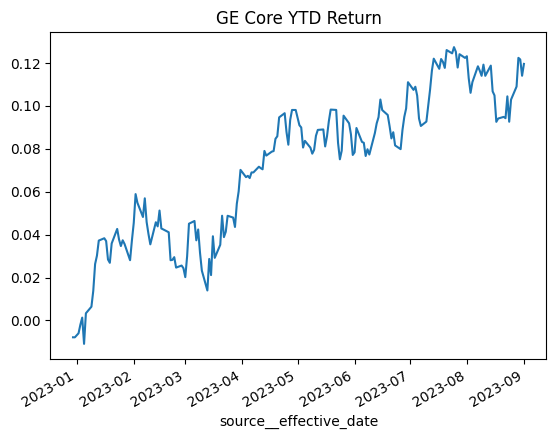

In [123]:
total_return = pr.get_total_return(port_ts)
display(total_return)
total_return['cum_return'].plot(title = 'GE Core YTD Return')

In [124]:
#Query portfolio and benchmark total returns
#Benchmark can be a ticker from the CMF benchmark table, or from the bloomberg table

#total_returns = pr.query_total_returns(ocm_bm_id='BBTSXKOK',bm_type='cmf') 
total_returns = pr.query_total_returns(ocm_bm_id='M1WD',bm_type='bbg') 
display(total_returns)

#Equity return calculates the return excluding any non-equity assets in the portfolio (e.g cash, FX forwards, rates etc)

,total_return,equity_return,benchmark_return
2022-12-30,-0.007850,-0.007906,-0.003264
2022-12-31,-0.000016,-0.000024,0.000000
2023-01-01,0.000000,0.000000,0.000000
2023-01-02,0.001912,0.001942,0.001543
2023-01-03,0.004041,0.003431,-0.001352
2023-01-04,0.003277,0.002954,0.009381
2023-01-05,-0.012215,-0.012671,-0.008795
2023-01-06,0.014418,0.014376,0.019319
2023-01-07,0.000000,0.000000,0.000000
2023-01-08,0.000000,0.000000,0.000000


In [125]:
#Calculate the max drawdown for the total returns
max_dd = pr.calc_max_drawdown(total_returns['equity_return'],freq='D',lookback=252)
active_ret = total_returns['total_return'] - total_returns['benchmark_return']


max_active_dd = pr.calc_max_drawdown(active_ret,freq='D',lookback=252)

<Axes: title={'center': 'Active Drawdown'}>

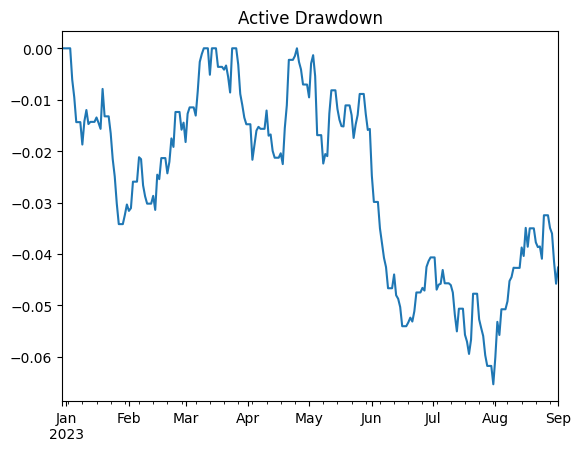

In [126]:
max_active_dd.plot(title='Active Drawdown')

In [128]:
#Get asset contribution to return 
asset_cont = pr.get_asset_cont()

In [129]:
display(asset_cont.head())

asset_class_pnl  exposure_base_delta_adj  \
date       security__id_isin                                             
2022-12-31 CA0636711016                   0.0             0.000000e+00   
           CA11271J1075                   0.0             7.901669e+07   
           CA1130041058                   0.0             1.800228e+07   
           CA1363851017                   0.0             1.980349e+08   
           CA13645T1003                   0.0             2.062293e+08   

                              prev_exposure    weight  total_return  cont_tr  
date       security__id_isin                                                  
2022-12-31 CA0636711016        0.000000e+00  0.000000           NaN      0.0  
           CA11271J1075        7.901669e+07  0.006923           0.0      0.0  
           CA1130041058        1.800228e+07  0.001577           0.0      0.0  
           CA1363851017        1.980349e+08  0.017351           0.0      0.0  
           CA13645T1003        2.062293e+08  0.018069           0.0      0.0

In [130]:
asset_cont.xs(end_date).sort_values(by=['cont_tr'],ascending=False)

,asset_class_pnl,exposure_base_delta_adj,prev_exposure,weight,total_return,cont_tr
security__id_isin,,,,,,
US0231351067,2116557.22,4.652999e+08,4.631833e+08,0.044777,0.004570,0.017242
US00724F1012,3788540.57,3.573789e+08,3.535904e+08,0.034182,0.010714,0.016230
US5949181045,2724601.91,4.202367e+08,4.175121e+08,0.040362,0.006526,0.013075
US02079K3059,3384.42,3.349578e+08,3.349544e+08,0.032381,0.000010,0.012867
US8636671013,2275536.85,3.294297e+08,3.271542e+08,0.031627,0.006956,0.005353
NL0010273215,1397543.41,2.438375e+08,2.424400e+08,0.023437,0.005764,0.005146
IE00B4BNMY34,2910572.89,1.839439e+08,1.810333e+08,0.017501,0.016078,0.004736
FR0000120578,-258779.70,3.283495e+08,3.286083e+08,0.031767,-0.000788,0.004582
US57636Q1040,2838207.48,2.632976e+08,2.604594e+08,0.025179,0.010897,0.004290


In [131]:
#Set a benchmark for the portfolio returns object, using the same logic as before
pr.set_benchmark(['MXKO','SPTSX'],[0.8,0.2])
pr.get_benchmark_constituents()

#Set factor loadings for portfolio and benchmark constituents so we can run the attribution
pr.set_factor_loading_ts()

No match: ['KEPPEL CORP (DETACHED 2)', None, 'Logan Energy Corp.', 'CAPITALAND INV(DETACHED)']
Total weight: 19.3131%
['IE00BZ12WP82', 'UNDEFINED']
['CA8520661098', 'LU0156801721', 'FR0014000MR3', 'LU1673108939', 'LU1598757687', 'KYG7800X1079', 'SG1J27887962', 'BMG0450A1053', 'CA14068G1046', 'BMG162521014', 'CA0019401052', 'CA55027C1068', 'CA4558711038', 'US58733R1023', 'CA2849021035', 'CA5408991019', 'BMG3223R1088', 'XS0055158231', 'IL0011741688', 'SE0011166941', 'BMG162581083', 'JE00BYSS4X48', 'IM00B5VQMV65', 'CA2945051027', 'BMG4587L1090', 'US0374111054', 'CA0977512007', 'IE00BZ12WP82', 'CA1125851040', 'CA16141A1030', 'BMG162341090', 'CA05651W2094', 'CA74022D3085']
RiskFactors initialized for 2023-09-07
Done!


In [132]:
display(pr.portfolio_loading.head()) #portfolio factor loading time series

factor,GEMLT_AEROSPCE,GEMLT_AUTOCOMP,GEMLT_BANKS,GEMLT_BETA,GEMLT_BIOTECH,GEMLT_BLDCNSTR,GEMLT_BTOP,GEMLT_CAN,GEMLT_CAPMRKTS,GEMLT_CHE,GEMLT_CHEMICAL,GEMLT_COMMSVCS,GEMLT_COMPUTER,GEMLT_CONSDUR,GEMLT_CONSVCS,GEMLT_DEU,GEMLT_DIVFIN,GEMLT_DIVMETAL,GEMLT_DIVYILD,GEMLT_EARNQLTY,GEMLT_EARNVAR,GEMLT_EARNYILD,GEMLT_FOODPRD,GEMLT_FOODRETL,GEMLT_FRA,GEMLT_GBR,GEMLT_GROWTH,GEMLT_HLTHEQP,GEMLT_HLTHSVC,GEMLT_HSHLDPRD,GEMLT_INOILGAS,GEMLT_INSURNCE,GEMLT_INTERNET,GEMLT_INVSQLTY,GEMLT_LEVERAGE,GEMLT_LIQUIDTY,GEMLT_LTREVRSL,GEMLT_MACHINRY,GEMLT_MEDIA,GEMLT_MIDCAP,GEMLT_MOMENTUM,GEMLT_NLD,GEMLT_OILEXPL,GEMLT_OILGAS,GEMLT_PHARMA,GEMLT_PROFIT,GEMLT_REALEST,GEMLT_RESVOL,GEMLT_RETAIL,GEMLT_RLESTMNG,GEMLT_SEMICOND,GEMLT_SIZE,GEMLT_SMICNDEQ,GEMLT_SOFTWARE,GEMLT_STEEL,GEMLT_SWE,GEMLT_TELECOM,GEMLT_THRIFTS,GEMLT_TRNSPORT,GEMLT_USA,GEMLT_UTILITY,GEMLT_WORLD,CAD,CHF,EUR,GBP,SEK,USD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-31,0.004106,0.0,0.048010,0.040641,0.009100,0.012551,-0.163585,0.134117,0.050017,0.038632,0.004482,0.035572,0.020177,0.013618,0.005157,0.045454,0.000849,0.007065,-0.041668,-0.035403,-0.328857,-0.092500,0.096476,0.000596,0.058166,0.015310,0.002211,0.065519,0.025916,0.017025,0.018773,0.039315,0.034881,0.097431,-0.073456,-0.180538,-0.113789,0.020815,0.012478,-0.268910,0.052462,0.029853,0.023178,0.020989,0.092450,0.084413,0.013041,-0.430185,0.027797,0.009867,0.033452,0.488828,0.022496,0.132193,0.000790,0.009900,0.009803,0.002561,0.034457,0.537339,0.064507,1.0,0.147770,0.050624,0.171050,0.019301,0.014267,0.596989
2023-01-02,0.004106,0.0,0.048010,0.040641,0.009100,0.012551,-0.163585,0.134117,0.050017,0.038632,0.004482,0.035572,0.020177,0.013618,0.005157,0.045454,0.000849,0.007065,-0.041668,-0.035403,-0.328857,-0.092500,0.096476,0.000596,0.058166,0.015310,0.002211,0.065519,0.025916,0.017025,0.018773,0.039315,0.034881,0.097431,-0.073456,-0.180538,-0.113789,0.020815,0.012478,-0.268910,0.052462,0.029853,0.023178,0.020989,0.092450,0.084413,0.013041,-0.430185,0.027797,0.009867,0.033452,0.488828,0.022496,0.132193,0.000790,0.009900,0.009803,0.002561,0.034457,0.537339,0.064507,1.0,0.147770,0.050624,0.171050,0.019301,0.014267,0.596989
2023-01-03,0.004098,0.0,0.047913,0.041054,0.009081,0.012660,-0.164032,0.133845,0.049932,0.038554,0.004473,0.035500,0.020136,0.013874,0.005147,0.045563,0.000849,0.007051,-0.042029,-0.035419,-0.328745,-0.092651,0.096532,0.000595,0.059012,0.015279,0.002543,0.065386,0.025863,0.017044,0.018735,0.039223,0.034810,0.097410,-0.074245,-0.180269,-0.114247,0.020773,0.012453,-0.269053,0.053120,0.030350,0.023131,0.020946,0.092924,0.085145,0.013014,-0.429944,0.027784,0.009847,0.033526,0.488997,0.023034,0.131962,0.000789,0.009986,0.009783,0.002556,0.034387,0.536248,0.064376,1.0,0.147470,0.050521,0.172581,0.019261,0.014390,0.595776
2023-01-04,0.004114,0.0,0.045241,0.044504,0.009093,0.012638,-0.164546,0.130952,0.050230,0.038726,0.004495,0.035661,0.019637,0.013949,0.005183,0.045641,0.000840,0.007116,-0.045045,-0.034919,-0.328617,-0.094244,0.096481,0.000584,0.058975,0.015527,0.002731,0.065666,0.025420,0.017151,0.018782,0.039363,0.035300,0.095687,-0.075492,-0.183493,-0.113255,0.021016,0.012717,-0.267571,0.050986,0.030410,0.022085,0.020836,0.093130,0.086019,0.013061,-0.429245,0.027900,0.010074,0.033494,0.486501,0.023022,0.132712,0.000796,0.009969,0.009830,0.002624,0.034716,0.538575,0.064764,1.0,0.144353,0.050750,0.172866,0.019563,0.014366,0.598103
2023-01-05,0.004014,0.0,0.039786,0.048793,0.009261,0.012874,-0.167572,0.127554,0.050840,0.039531,0.004382,0.035631,0.019606,0.014647,0.005160,0.046860,0.000831,0.007112,-0.048715,-0.034214,-0.328272,-0.097873,0.097828,0.000562,0.060244,0.015151,0.001939,0.066647,0.024459,0.017604,0.018244,0.040382,0.034728,0.094334,-0.075936,-0.186219,-0.111204,0.021143,0.013021,-0.264811,0.055241,0.031363,0.021852,0.020829,0.093866,0.088530,0.013494,-0.429169,0.028037,0.010194,0.034254,0.482015,0.023759,0.130602,0.000795,0.010155,0.009985,0.002650,0.035051,0.538213,0.064957,1.

In [133]:
display(pr.active_loading.head()) #active factor loading time series

factor,GEMLT_PRT,GEMLT_CAN,GEMLT_INTERNET,GEMLT_COMPUTER,GEMLT_COMMUNIC,GEMLT_CONSTPP,GEMLT_AEROSPCE,GEMLT_SIZE,EUR,GEMLT_AUT,GEMLT_GBR,GEMLT_INSURNCE,SGD,GEMLT_EARNVAR,SEK,GEMLT_DEU,GEMLT_DIVYILD,GEMLT_MIDCAP,GEMLT_MOMENTUM,GEMLT_HLTHSVC,GEMLT_SWE,CAD,GEMLT_CHEMICAL,GEMLT_CONSVCS,GEMLT_THRIFTS,GEMLT_AGROCHEM,GEMLT_RESVOL,GEMLT_NZL,GEMLT_DNK,GEMLT_ENERGY,GEMLT_PRECMETL,GEMLT_ESP,CHF,ILS,GEMLT_INOILGAS,GEMLT_PHARMA,GEMLT_OILGAS,GEMLT_LEVERAGE,GEMLT_DIVFIN,GEMLT_INVSQLTY,GEMLT_BETA,GEMLT_ISR,GEMLT_ITA,GEMLT_SGP,HKD,GEMLT_AUS,GEMLT_GROWTH,GEMLT_RETAIL,GEMLT_BTOP,GEMLT_AUTOCOMP,GEMLT_NOR,GEMLT_SMICNDEQ,GEMLT_PROFIT,GEMLT_BIOTECH,GEMLT_IRL,GEMLT_FOODPRD,GEMLT_BLDCNSTR,GEMLT_COMMSVCS,GEMLT_CAPMRKTS,GEMLT_FRA,GEMLT_UTILITY,NZD,GBP,GEMLT_HLTHEQP,GEMLT_HKG,DKK,GEMLT_CONSDUR,NOK,GEMLT_NLD,GEMLT_LTREVRSL,GEMLT_DIVMETAL,AUD,GEMLT_EARNYILD,GEMLT_REALEST,GEMLT_STEEL,GEMLT_USA,GEMLT_LIQUIDTY,GEMLT_WORLD,GEMLT_BEL,USD,GEMLT_TRNSPORT,GEMLT_FIN,GEMLT_RLESTMNG,GEMLT_OILEXPL,GEMLT_CHE,GEMLT_EARNQLTY,GEMLT_MACHINRY,GEMLT_GOLD,GEMLT_RGNLBNKS,GEMLT_TELECOM,GEMLT_MEDIA,GEMLT_SOFTWARE,GEMLT_BANKS,GEMLT_SEMICOND,GEMLT_AIRLINES,GEMLT_FOODRETL,GEMLT_HSHLDPRD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31,-0.000578,-0.074962,0.001863,-0.024439,-0.006067,-0.007573,-0.013866,0.259769,0.089142,-0.000586,-0.015771,0.001296,-0.003203,-0.258856,0.006786,0.025903,-0.082253,-0.208309,-0.014728,-0.002371,0.003079,-0.077075,-0.010420,-0.012687,0.002118,-0.005143,-0.188534,-0.000449,-0.006629,-0.002128,-0.001661,-0.005926,0.023338,-0.001360,-0.004217,0.034400,-0.003060,-0.084500,-0.011135,0.042358,-0.066695,-0.001293,-0.005530,-0.003303,-0.006941,-0.017094,-0.000537,-0.004169,-0.133808,-0.015565,-0.001659,0.012381,0.049842,-0.006919,-0.001730,0.057202,0.003794,0.014132,-0.009112,0.030392,0.017428,-0.001307,-0.019577,0.039078,-0.007205,-0.007317,-0.001627,-0.001910,0.019270,-0.034526,-0.009103,-0.018848,-0.103233,-0.011033,-0.002727,0.006591,-0.180177,0.0,-0.002676,0.018273,0.002277,-0.002362,0.007403,-0.012834,0.016438,-0.026007,-0.015310,-0.014733,-0.005516,-0.008535,-0.003634,0.035050,-0.026241,0.004356,-0.001165,-0.018666,-0.000877
2023-01-02,-0.000585,-0.074918,0.001915,-0.024358,-0.006074,-0.007584,-0.013896,0.259798,0.088024,-0.000592,-0.015711,0.001303,-0.003196,-0.259079,0.006673,0.025663,-0.082695,-0.208323,-0.014918,-0.002316,0.002975,-0.077027,-0.010468,-0.012671,0.002118,-0.005151,-0.188531,-0.000449,-0.006694,-0.002126,-0.001661,-0.006013,0.023386,-0.001351,-0.004230,0.034448,-0.003059,-0.084687,-0.011152,0.042346,-0.066498,-0.001284,-0.005625,-0.003297,-0.006929,-0.017074,-0.000465,-0.004185,-0.134249,-0.015641,-0.001665,0.012289,0.050048,-0.006902,-0.001726,0.057237,0.003769,0.014148,-0.009075,0.029922,0.017401,-0.000475,-0.019503,0.039109,-0.007192,-0.007386,-0.001678,-0.001919,0.019076,-0.034863,-0.009094,-0.019652,-0.103621,-0.011005,-0.002722,0.007587,-0.180559,0.0,-0.002705,0.019355,0.002242,-0.002409,0.007393,-0.012844,0.016483,-0.026199,-0.015347,-0.014728,-0.005505,-0.008565,-0.003610,0.035171,-0.026339,0.004398,-0.001166,-0.018652,-0.000869
2023-01-03,-0.000578,-0.074810,0.001260,-0.023145,-0.006111,-0.007660,-0.013935,0.260302,0.089528,-0.000594,-0.016262,0.001003,-0.003195,-0.255620,0.006816,0.025711,-0.083467,-0.208782,-0.009754,-0.001955,0.003075,-0.077216,-0.010496,-0.012830,0.002111,-0.005087,-0.186313,-0.000445,-0.006735,-0.002046,-0.001727,-0.005981,0.022987,-0.001363,-0.003741,0.034483,-0.002639,-0.085650,-0.011140,0.043266,-0.064922,-0.001288,-0.005667,-0.003308,-0.007055,-0.0

In [134]:
#Run an active factor attribution against blended benchmark
#Specify the relevant benchmark ticker to query returns out of CMF's database
#Passing bm_type = 'cmf' will query from performance_percentage_return_benchmark in digitalplatform
#Passing bm_type = 'bbg' will query from bbg_index 

factor_attr,factor_grp,total_returns = pr.factor_attribution(attr_type='active',ocm_bm_id='BBTSXKOK',bm_type='cmf')

invalid value encountered in double_scalars


In [135]:
factor_attr

,Factor Name,Factor Group,Average Exposure,Factor Return,Return Impact
factor,,,,,
GEMLT_BETA,GEM Beta,Risk Indices,-5.028919e-02,0.022882,-4.447455e-03
GEMLT_COMPUTER,GEM Computers and Electronics,Industries,-3.371628e-02,0.119487,-4.283455e-03
GEMLT_BTOP,GEM Book-to-Price,Risk Indices,-1.397631e-01,0.026417,-4.076990e-03
GEMLT_LIQUIDTY,GEM Liquidity,Risk Indices,-1.666743e-01,0.015400,-2.920239e-03
GEMLT_UTILITY,GEM Utilities,Industries,1.580777e-02,-0.119266,-2.840149e-03
GEMLT_FOODPRD,GEM Food and Beverage and Tobacco,Industries,5.088421e-02,-0.057646,-2.816585e-03
GEMLT_NLD,GEM Netherlands Mkt,Countries,2.663893e-02,-0.071035,-2.629004e-03
GEMLT_MOMENTUM,GEM Momentum,Risk Indices,-2.412170e-02,0.012236,-2.371437e-03
GEMLT_AUTOCOMP,GEM Automobiles and Components,Industries,-1.931567e-02,0.099326,-2.307415e-03


In [136]:
#Show the buildup from the benchmark return to the portfolio return based on each factor group's contribution
display(factor_grp)

,Factor Group,Return Impact
idx,,
0,Benchmark,1.457305e-01
1,Risk Indices,-1.377656e-02
2,Industries,-1.011686e-02
3,Countries,-8.554845e-03
4,Market,1.746199e-20
5,Currencies,1.459725e-03
6,Implementation,2.072365e-03
7,Idiosyncratic,2.773566e-03
8,Portfolio,1.195879e-01


<Axes: >

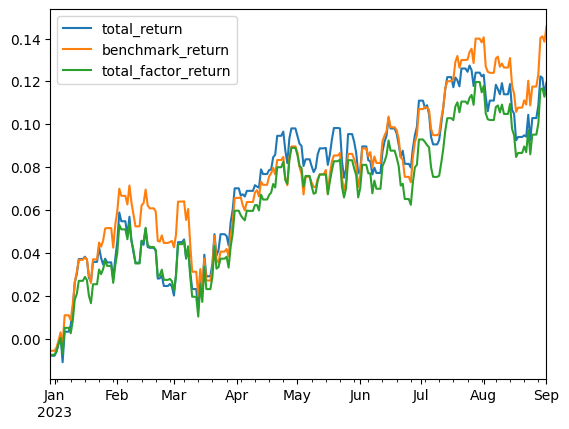

In [137]:
total_returns['total_factor_return'] = total_returns['total_factor_return'] + total_returns['benchmark_return'] #Get implied factor return by adding active factor returns to benchmark
total_returns[['total_return','benchmark_return','total_factor_return']].plot()

In [142]:
#Get the contribution of each individual asset to total, factor and idiosyncratic return
port_asset_factor_attr,asset_factor_ts = pr.port_asset_factor_attribution(return_time_series=True)

#Run a standalone factor decomposition on each individual asset
standalone_asset_factor_attr = pr.standalone_asset_factor_attribution()

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


In [143]:
port_asset_factor_attr.head()

,ticker,avg_weight,total_return,factor_return,specific_return,cont_tr,cont_factor_tr,cont_specific_tr
security__id_isin,,,,,,,,
CA0636711016,BMO,0.010673,-0.024348,0.001361,-0.025710,-0.000471,0.000051,-0.000521
CA11271J1075,BN,0.009090,0.111973,0.072532,0.039440,0.000999,0.000579,0.000420
CA1130041058,BAM,0.000404,0.182183,0.043217,0.138966,0.000306,0.000067,0.000239
CA1363851017,CNQ,0.018890,0.204394,0.102347,0.102047,0.004149,0.002098,0.002051
CA13645T1003,CP,0.008245,0.036485,0.062514,-0.026029,0.000690,0.001228,-0.000537


In [140]:
standalone_asset_factor_attr

avg_exp  factor_ret  factor_cont_adj
security__id_isin factor                                               
CA0636711016      CAD             1.000000    0.000000         0.000000
                  GEMLT_BANKS     0.896387   -0.025546        -0.022997
                  GEMLT_BETA     -0.164002    0.027231        -0.004513
                  GEMLT_BTOP      0.468325    0.029773         0.012932
                  GEMLT_CAN       0.997878    0.018474         0.014919
                  GEMLT_CAPMRKTS  0.126786   -0.027477        -0.003161
                  GEMLT_DIVYILD   0.723728    0.005458         0.002461
                  GEMLT_EARNQLTY -0.814815    0.011373        -0.009464
                  GEMLT_EARNVAR  -0.232242   -0.002515         0.000241
                  GEMLT_EARNYILD  0.444096   -0.002238        -0.000508
                  GEMLT_GROWTH   -0.057197    0.011376        -0.000586
                  GEMLT_INVSQLTY -0.082131    0.009913        -0.000519
                  GEMLT_LEVERAGE  0.540666    0.000869         0.000198
                  GEMLT_LIQUIDTY  0.335544    0.014917         0.005228
                  GEMLT_LTREVRSL -0.495717    0.006869        -0.005020
                  GEMLT_MIDCAP   -0.458494    0.005917        -0.003549
                  GEMLT_MOMENTUM -0.321821    0.008360        -0.009726
                  GEMLT_PROFIT   -0.910232    0.010909        -0.011899
                  GEMLT_RESVOL   -1.193940   -0.000300         0.007406
                  GEMLT_SIZE      0.712837    0.005895         0.006237
                  GEMLT_WORLD     1.000000    0.085238         0.082344
CA11271J1075      CAD             1.000000    0.000000         0.000000
                  GEMLT_BETA      0.977334    0.027231         0.018676
                  GEMLT_BTOP      0.378521    0.029773         0.009780
                  GEMLT_CAN       0.958273    0.018474         0.015680
                  GEMLT_CAPMRKTS  1.099680   -0.027477        -0.018784
                  GEMLT_DIVYILD  -0.931522    0.005458        -0.003194
                  GEMLT_EARNQLTY  0.210282    0.011373         0.002330
                  GEMLT_EARNVAR  -0.093278   -0.002515        -0.001175
                  GEMLT_EARNYILD  0.100192   -0.002238         0.000222
                  GEMLT_GROWTH    0.722937    0.011376         0.009435
                  GEMLT_INVSQLTY -0.473482    0.009913        -0.003482
                  GEMLT_LEVERAGE  1.634859    0.000869        -0.000095
                  GEMLT_LIQUIDTY -1.050005    0.014917        -0.015779
                  GEMLT_LTREVRSL -0.319480    0.006869        -0.002582
                  GEMLT_MIDCAP   -0.381558    0.005917        -0.003189
                  GEMLT_MOMENTUM -0.651019    0.008360        -0.011313
                  GEMLT_PROFIT   -0.616306    0.010909        -0.008018
                  GEMLT_RESVOL   -0.332412   -0.000300         0.002969
                  GEMLT_RLESTMNG  0.018575   -0.063128        -0.001161
                  GEMLT_SIZE      0.605099    0.005895         0.005151
                  GEMLT_UTILITY   0.033504   -0.117984        -0.004183
                  GEMLT_WORLD     1.000000    0.085238         0.081244
CA1130041058      CAD             1.000000    0.000000         0.000000
                  GEMLT_BETA     -0.042252    0.027231        -0.004651
                  GEMLT_BTOP      0.145963    0.029773         0.004873
                  GEMLT_CAN       1.093881    0.018474         0.015440
                  GEMLT_CAPMRKTS  1.080435   -0.027477        -0.020411
                  GEMLT_DIVYILD   0.080143    0.005458         0.000517
                  GEMLT_EARNQLTY -0.702315    0.011373        -0.004875
...                                    ...         ...              ...
US9078181081      GEMLT_MIDCAP   -0.369981    0.005917        -0.002837
                  GEMLT_MOMENTUM -0.537465    0.008360        -0.012514
                  GEMLT_PROFIT   -0.479716    0.010909        -0.005962
   